In [1]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [2]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=7eaec82a448bd6913e17e6fe11e2c9eb325504fe8a9f0c67a37aea53aa87814d
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [3]:
import pandas as pd
import numpy as np
import pickle
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nfx
import nltk
from nltk.corpus import stopwords
plt.style.use('ggplot')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from wordcloud import WordCloud
df_og = pd.read_csv('/content/drive/MyDrive//SoCal Hackathon/CA_review.csv')

In [6]:
df_og.head(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
1,1,9ag-bC-521T1i3IypXr4Ug,sx_cqxyWRUoOIoy_AXmLdQ,B5XSoSG3SfvQGtKEGQ1tSQ,4,1,0,0,I work with a college group that does camping ...,2013-09-07 21:16:36
2,2,80p5xO3dbpd80T6vPTL8DQ,D7ct4p7uUk5t4LFSjVnO4A,B5XSoSG3SfvQGtKEGQ1tSQ,5,0,0,0,My SO and I love exploring new trails and so i...,2018-08-05 21:50:27
3,3,RScubg9WIp165432dQfVHQ,r9VkVP_4d2_KMHA9ZN2c6w,B5XSoSG3SfvQGtKEGQ1tSQ,5,14,9,13,I can't believe there's only one review for th...,2011-07-06 23:14:29
4,4,_JsMDKDQJ8uc6logHxA0-w,s0l9vVweCwvudj5TNGMl6w,B5XSoSG3SfvQGtKEGQ1tSQ,5,1,0,0,I love this area for hiking! I go there all th...,2016-04-03 03:24:46


In [7]:
df = df_og.loc[df_og.business_id == '1PoZ8XdISWJpvcEnlNyfgg']

In [8]:
df['text'] = df['text'].apply(nfx.remove_stopwords)
df['text'] = df['text'].apply(nfx.remove_userhandles)
df['text'] = df['text'].apply(nfx.remove_punctuations)
df['text'] = df['text'].apply(nfx.remove_emojis)
df['text'] = df['text'].apply(nfx.remove_hashtags)
df['text'] = df['text'].str.lower()

<ipython-input-8-aebf20929664>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(nfx.remove_stopwords)
<ipython-input-8-aebf20929664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(nfx.remove_userhandles)
<ipython-input-8-aebf20929664>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



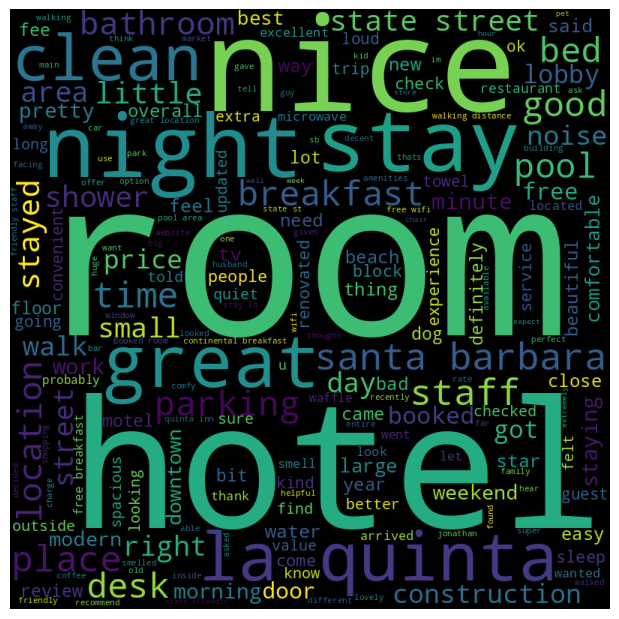

In [76]:
def generate_wordcloud(df):
    text = " ".join(review for review in df["text"])
    wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(text)

    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

generate_wordcloud(df )

## We assign sentiment labels of positive negative and neutral to the reviews 


In [10]:
# make a copy 
df1 = df

In [11]:
df1['sentiment'] = df1['stars'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

<ipython-input-11-f8f94404b005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = df1['stars'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')


In [12]:
df1

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
111714,111714,4mDy5QhRtze_s8M9lmwBBQ,n7FQVOWXuYHpEC7KZ9Wtag,1PoZ8XdISWJpvcEnlNyfgg,4,0,1,0,stay hotel labor day weekend room huge compare...,2013-09-04 00:21:20,positive
111715,111715,0kWTM9bPzfOvCQlEYqvFUw,SMtnt_oPzwaNnMkDTa_zrQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,0,0,brought 38 women garden club stay nights 3 day...,2014-05-07 19:36:22,positive
111716,111716,Q0hPRnhBB3M5PT9GOW3b6A,-M-6PyKYXUFNzUbUQpXCQw,1PoZ8XdISWJpvcEnlNyfgg,4,0,0,0,clean hotelvery friendly staffvery clean roomt...,2018-09-03 03:41:51,positive
111717,111717,pnhKx1NySoIz0YC6yYIuFg,5vZi2nrHK4ZS-MhidHkxPQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,1,0,https://youtube/zuj1wktudzu book rooms hotelsc...,2016-09-19 00:07:07,positive
111718,111718,1nODsHJFRQ5nutVdkaBMpA,hdh1NGuOoX3vJ-GRAVyNKA,1PoZ8XdISWJpvcEnlNyfgg,3,0,0,1,la quinta inn decent hotel leave dying return ...,2015-01-04 05:57:57,neutral
...,...,...,...,...,...,...,...,...,...,...,...
111895,111895,iZCdOdgRsPFHqIFcPK_VWA,_k5ei-5SYKYVRDlAnyDBpw,1PoZ8XdISWJpvcEnlNyfgg,3,1,1,1,excellent location completely overpriced actua...,2018-12-03 20:23:05,neutral
111896,111896,wF6DXWjUMAoG1QlZWB3K7g,RTz_E92YRqSdtbNmd-yxoA,1PoZ8XdISWJpvcEnlNyfgg,3,2,0,0,ok thats all large room thought balcony pictur...,2021-08-19 06:13:05,neutral
111897,111897,0olRpolucqI2tnqwh40Xaw,WLo2ZDq495BISJafHs37Wg,1PoZ8XdISWJpvcEnlNyfgg,5,5,3,3,w motels think considered motel hallways outsi...,2015-06-17 12:15:33,positive
111898,111898,suR0hTzlglkZWBM2mJqKiA,1Pbz_XjiIYMas_0u9nMZzg,1PoZ8XdISWJpvcEnlNyfgg,1,0,0,0,stay here gave bad review 1 internet horrible ...,2021-12-11 22:10:03,negative


<Axes: >

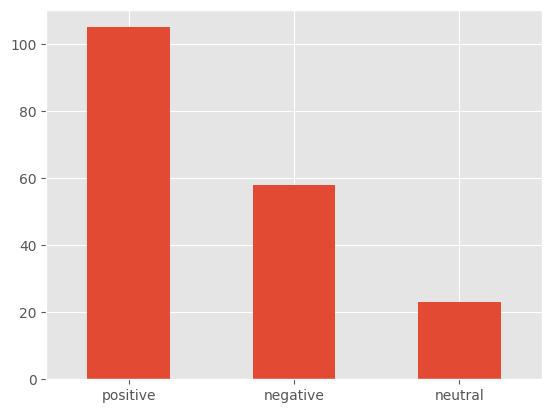

In [13]:
sentiment_counts = df1['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)

NameError: ignored

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# Define target and variables
target = df1['sentiment']
text = df1['text']

In [16]:
# Vectorize and Transform
tf = TfidfVectorizer()
text = tf.fit_transform(text)

In [17]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size = .2, stratify=target)

In [18]:
# Naive Bayes 
nv = MultinomialNB()
nv.fit(X_train, y_train)

MultinomialNB()

In [19]:
nv.score(X_test, y_test)

0.5526315789473685

In [20]:
# Logistic Regression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [21]:
lr.score(X_test, y_test)



0.6842105263157895

In [24]:
!pip install -U sentence-transformers

## Try with transformers instead of Vectorizor
from sentence_transformers import SentenceTransformer
df2 = df
df2.reset_index(inplace=True, drop=False)
df2.rename(columns={'index': 'ID'}, inplace=True)
target = df2['sentiment']
text = df2['text']

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-24-7be47f9a444e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'index': 'ID'}, inplace=True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size = .2, stratify=target)

In [26]:
# Logistic Regression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [27]:
lr.score(X_test, y_test)

0.7368421052631579

## We use vader to assign a score to each review for positive negative and neutral

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
from tqdm import tqdm

In [30]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    try:
        text = row['text']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        res[myid] = vader_result_rename
    except RuntimeError:
        print(f'Broke for id {myid}')

100%|██████████| 186/186 [00:00<00:00, 404.86it/s]


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review_id'})
results_df = results_df.merge(df1, how='left')

In [32]:
results_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'ID', 'ID', 'Unnamed: 0', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'sentiment'],
      dtype='object')

In [33]:
results_df

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,ID,ID,Unnamed: 0,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,4mDy5QhRtze_s8M9lmwBBQ,0.000,0.698,0.302,0.8555,0,111714,111714,n7FQVOWXuYHpEC7KZ9Wtag,1PoZ8XdISWJpvcEnlNyfgg,4,0,1,0,stay hotel labor day weekend room huge compare...,2013-09-04 00:21:20,positive
1,0kWTM9bPzfOvCQlEYqvFUw,0.000,0.571,0.429,0.9601,1,111715,111715,SMtnt_oPzwaNnMkDTa_zrQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,0,0,brought 38 women garden club stay nights 3 day...,2014-05-07 19:36:22,positive
2,Q0hPRnhBB3M5PT9GOW3b6A,0.000,0.561,0.439,0.9201,2,111716,111716,-M-6PyKYXUFNzUbUQpXCQw,1PoZ8XdISWJpvcEnlNyfgg,4,0,0,0,clean hotelvery friendly staffvery clean roomt...,2018-09-03 03:41:51,positive
3,pnhKx1NySoIz0YC6yYIuFg,0.022,0.487,0.491,0.9902,3,111717,111717,5vZi2nrHK4ZS-MhidHkxPQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,1,0,https://youtube/zuj1wktudzu book rooms hotelsc...,2016-09-19 00:07:07,positive
4,1nODsHJFRQ5nutVdkaBMpA,0.017,0.744,0.239,0.9862,4,111718,111718,hdh1NGuOoX3vJ-GRAVyNKA,1PoZ8XdISWJpvcEnlNyfgg,3,0,0,1,la quinta inn decent hotel leave dying return ...,2015-01-04 05:57:57,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,iZCdOdgRsPFHqIFcPK_VWA,0.000,0.781,0.219,0.6808,181,111895,111895,_k5ei-5SYKYVRDlAnyDBpw,1PoZ8XdISWJpvcEnlNyfgg,3,1,1,1,excellent location completely overpriced actua...,2018-12-03 20:23:05,neutral
182,wF6DXWjUMAoG1QlZWB3K7g,0.072,0.666,0.262,0.9136,182,111896,111896,RTz_E92YRqSdtbNmd-yxoA,1PoZ8XdISWJpvcEnlNyfgg,3,2,0,0,ok thats all large room thought balcony pictur...,2021-08-19 06:13:05,neutral
183,0olRpolucqI2tnqwh40Xaw,0.000,0.693,0.307,0.9623,183,111897,111897,WLo2ZDq495BISJafHs37Wg,1PoZ8XdISWJpvcEnlNyfgg,5,5,3,3,w motels think considered motel hallways outsi...,2015-06-17 12:15:33,positive
184,suR0hTzlglkZWBM2mJqKiA,0.268,0.630,0.103,-0.9274,184,111898,111898,1Pbz_XjiIYMas_0u9nMZzg,1PoZ8XdISWJpvcEnlNyfgg,1,0,0,0,stay here gave bad review 1 internet horrible ...,2021-12-11 22:10:03,negative


## We classify the emotions of the eviews and look at the emtions over the years


In [34]:
pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43327 sha256=3c6de5ac00b3101d23f8f6b7e04fae8faa069608dd919adeecf83449f5dd748d
  Stored in directory: /root/.cache/pip/wheels/68/c4/f2/c390dd3eac398fdf45f7a01c6516bc53fa7a9ab59c7d2ff518
Successfully built NRCLex


In [35]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [36]:
from nrclex import NRCLex
str_review = ",".join(results_df["text"])
text_object = NRCLex(str_review)

In [37]:
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

In [40]:
from datetime import datetime

results_df['year'] = results_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y'))

results_df

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,ID,ID,Unnamed: 0,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,year
0,4mDy5QhRtze_s8M9lmwBBQ,0.000,0.698,0.302,0.8555,0,111714,111714,n7FQVOWXuYHpEC7KZ9Wtag,1PoZ8XdISWJpvcEnlNyfgg,4,0,1,0,stay hotel labor day weekend room huge compare...,2013-09-04 00:21:20,positive,2013
1,0kWTM9bPzfOvCQlEYqvFUw,0.000,0.571,0.429,0.9601,1,111715,111715,SMtnt_oPzwaNnMkDTa_zrQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,0,0,brought 38 women garden club stay nights 3 day...,2014-05-07 19:36:22,positive,2014
2,Q0hPRnhBB3M5PT9GOW3b6A,0.000,0.561,0.439,0.9201,2,111716,111716,-M-6PyKYXUFNzUbUQpXCQw,1PoZ8XdISWJpvcEnlNyfgg,4,0,0,0,clean hotelvery friendly staffvery clean roomt...,2018-09-03 03:41:51,positive,2018
3,pnhKx1NySoIz0YC6yYIuFg,0.022,0.487,0.491,0.9902,3,111717,111717,5vZi2nrHK4ZS-MhidHkxPQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,1,0,https://youtube/zuj1wktudzu book rooms hotelsc...,2016-09-19 00:07:07,positive,2016
4,1nODsHJFRQ5nutVdkaBMpA,0.017,0.744,0.239,0.9862,4,111718,111718,hdh1NGuOoX3vJ-GRAVyNKA,1PoZ8XdISWJpvcEnlNyfgg,3,0,0,1,la quinta inn decent hotel leave dying return ...,2015-01-04 05:57:57,neutral,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,iZCdOdgRsPFHqIFcPK_VWA,0.000,0.781,0.219,0.6808,181,111895,111895,_k5ei-5SYKYVRDlAnyDBpw,1PoZ8XdISWJpvcEnlNyfgg,3,1,1,1,excellent location completely overpriced actua...,2018-12-03 20:23:05,neutral,2018
182,wF6DXWjUMAoG1QlZWB3K7g,0.072,0.666,0.262,0.9136,182,111896,111896,RTz_E92YRqSdtbNmd-yxoA,1PoZ8XdISWJpvcEnlNyfgg,3,2,0,0,ok thats all large room thought balcony pictur...,2021-08-19 06:13:05,neutral,2021
183,0olRpolucqI2tnqwh40Xaw,0.000,0.693,0.307,0.9623,183,111897,111897,WLo2ZDq495BISJafHs37Wg,1PoZ8XdISWJpvcEnlNyfgg,5,5,3,3,w motels think considered motel hallways outsi...,2015-06-17 12:15:33,positive,2015
184,suR0hTzlglkZWBM2mJqKiA,0.268,0.630,0.103,-0.9274,184,111898,111898,1Pbz_XjiIYMas_0u9nMZzg,1PoZ8XdISWJpvcEnlNyfgg,1,0,0,0,stay here gave bad review 1 internet horrible ...,2021-12-11 22:10:03,negative,2021


In [44]:
df_2013 = results_df[(results_df['year'] == '2013') | (results_df['year'] == '2014') | (results_df['year'] == '2015')]

str_review = ",".join(df_2013["text"])
text_object = NRCLex(str_review)
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()


<Axes: >

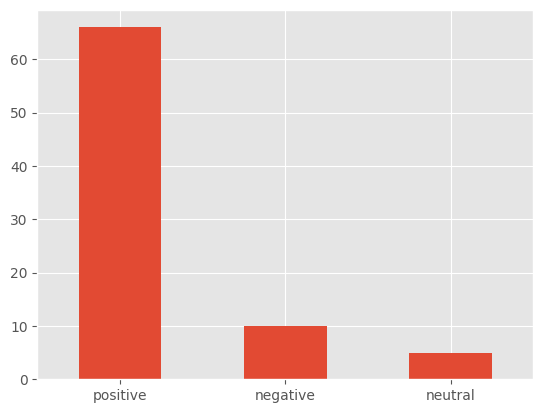

In [45]:
sentiment_counts = df_2013['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



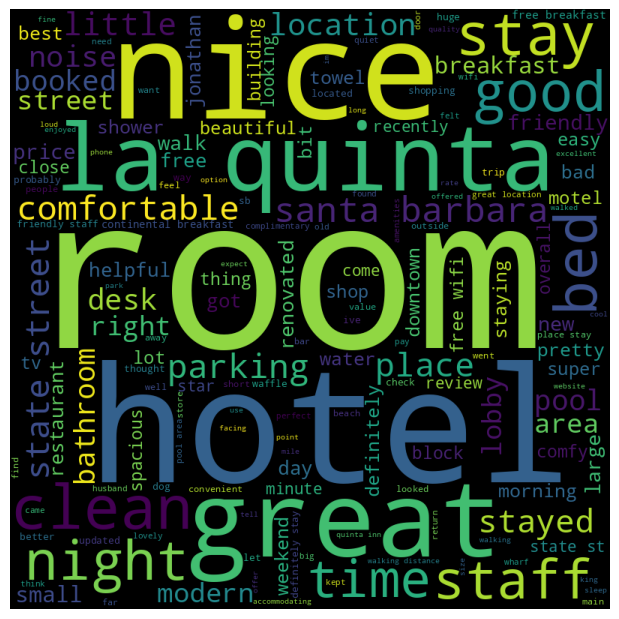

In [77]:
generate_wordcloud(df_2013)

In [47]:
df_2014 = results_df[(results_df['year'] == '2016') | (results_df['year'] == '2017') | (results_df['year'] == '2018')]

str_review = ",".join(df_2014["text"])
text_object = NRCLex(str_review)
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

<Axes: >

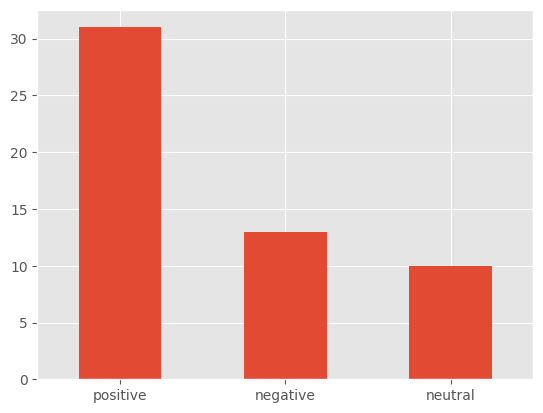

In [48]:
sentiment_counts = df_2014['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)

In [55]:
df_2015 = results_df[(results_df['year'] == '2019') | (results_df['year'] == '2020') | (results_df['year'] == '2021')]

str_review = ",".join(df_2015["text"])
text_object = NRCLex(str_review)
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

<Axes: >

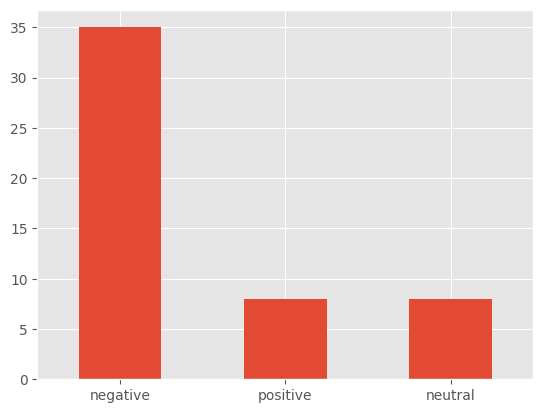

In [56]:
sentiment_counts = df_2015['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)

In [53]:
df_2016 = results_df[results_df['year'] == '2021']

str_review = ",".join(df_2016["text"])
text_object = NRCLex(str_review)
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

<Axes: >

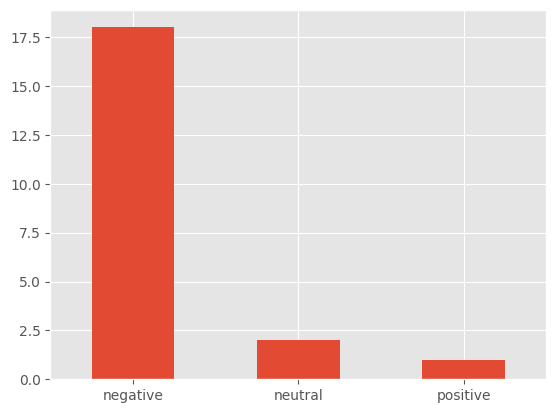

In [54]:
sentiment_counts = df_2016['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



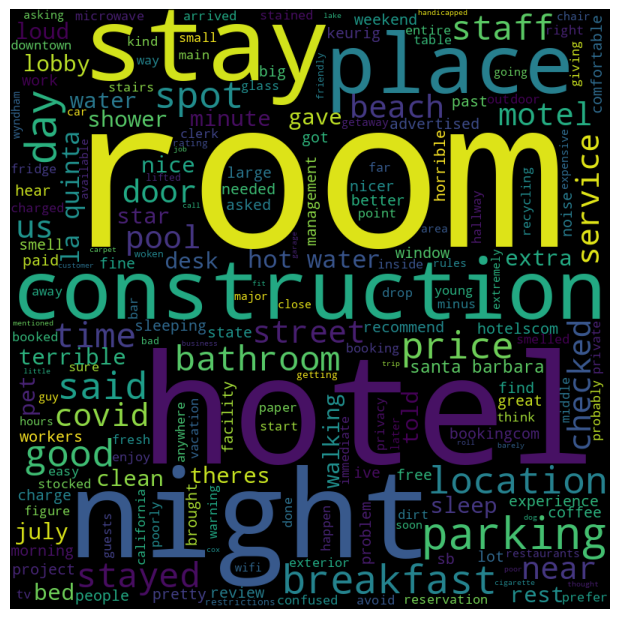

In [78]:
generate_wordcloud(df_2016)

In [57]:
for index, row in results_df.iterrows():
    text = row['text']
    text_object = NRCLex(text)
    emotions = text_object.affect_frequencies
    max_emotion = max(emotions, key=emotions.get)
    results_df.at[index, 'emotion_classification'] = max_emotion

In [58]:
# save the df 
results_df.to_csv('yelp_results.csv', index = False)

In [59]:
results_df = pd.read_csv('yelp_results.csv')

In [60]:
#!pip install --upgrade gensim
#!pip install pyldavis
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import preprocess_string

In [61]:
results_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'ID', 'ID.1', 'Unnamed: 0', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'sentiment', 'year',
       'emotion_classification'],
      dtype='object')

In [80]:
results_df.drop(columns=['ID', 'ID.1', 'Unnamed: 0'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,review_id,vader_neg,vader_neu,vader_pos,vader_compound,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,year,emotion_classification,cleaned_text,assigned_topic_id,assigned_topic_score
0,4mDy5QhRtze_s8M9lmwBBQ,0.000,0.698,0.302,0.8555,n7FQVOWXuYHpEC7KZ9Wtag,1PoZ8XdISWJpvcEnlNyfgg,4,0,1,0,stay hotel labor day weekend room huge compare...,2013-09-04 00:21:20,positive,2013,positive,"[stai, hotel, labor, dai, weekend, room, huge,...",3,0.987488
1,0kWTM9bPzfOvCQlEYqvFUw,0.000,0.571,0.429,0.9601,SMtnt_oPzwaNnMkDTa_zrQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,0,0,brought 38 women garden club stay nights 3 day...,2014-05-07 19:36:22,positive,2014,positive,"[brought, women, garden, club, stai, night, da...",2,0.990103
2,Q0hPRnhBB3M5PT9GOW3b6A,0.000,0.561,0.439,0.9201,-M-6PyKYXUFNzUbUQpXCQw,1PoZ8XdISWJpvcEnlNyfgg,4,0,0,0,clean hotelvery friendly staffvery clean roomt...,2018-09-03 03:41:51,positive,2018,positive,"[clean, hotelveri, friendli, staffveri, clean,...",0,0.985549
3,pnhKx1NySoIz0YC6yYIuFg,0.022,0.487,0.491,0.9902,5vZi2nrHK4ZS-MhidHkxPQ,1PoZ8XdISWJpvcEnlNyfgg,5,1,1,0,https://youtube/zuj1wktudzu book rooms hotelsc...,2016-09-19 00:07:07,positive,2016,positive,"[http, youtub, zujwktudzu, book, room, hotelsc...",7,0.993839
4,1nODsHJFRQ5nutVdkaBMpA,0.017,0.744,0.239,0.9862,hdh1NGuOoX3vJ-GRAVyNKA,1PoZ8XdISWJpvcEnlNyfgg,3,0,0,1,la quinta inn decent hotel leave dying return ...,2015-01-04 05:57:57,neutral,2015,negative,"[quinta, inn, decent, hotel, leav, dy, return,...",7,0.997222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,iZCdOdgRsPFHqIFcPK_VWA,0.000,0.781,0.219,0.6808,_k5ei-5SYKYVRDlAnyDBpw,1PoZ8XdISWJpvcEnlNyfgg,3,1,1,1,excellent location completely overpriced actua...,2018-12-03 20:23:05,neutral,2018,positive,"[excel, locat, complet, overpr, actual, receiv...",0,0.984197
182,wF6DXWjUMAoG1QlZWB3K7g,0.072,0.666,0.262,0.9136,RTz_E92YRqSdtbNmd-yxoA,1PoZ8XdISWJpvcEnlNyfgg,3,2,0,0,ok thats all large room thought balcony pictur...,2021-08-19 06:13:05,neutral,2021,positive,"[that, larg, room, thought, balconi, pictur, l...",1,0.993199
183,0olRpolucqI2tnqwh40Xaw,0.000,0.693,0.307,0.9623,WLo2ZDq495BISJafHs37Wg,1PoZ8XdISWJpvcEnlNyfgg,5,5,3,3,w motels think considered motel hallways outsi...,2015-06-17 12:15:33,positive,2015,positive,"[motel, think, consid, motel, hallwai, outsid,...",7,0.994167
184,suR0hTzlglkZWBM2mJqKiA,0.268,0.630,0.103,-0.9274,1Pbz_XjiIYMas_0u9nMZzg,1PoZ8XdISWJpvcEnlNyfgg,1,0,0,0,stay here gave bad review 1 internet horrible ...,2021-12-11 22:10:03,negative,2021,negative,"[stai, gave, bad, review, internet, horribl, w...",5,0.994554


## Topic Modelling

In [81]:
def preprocess_text(text):
    return preprocess_string(text)

results_df['cleaned_text'] = results_df['text'].apply(preprocess_text)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [82]:
#need to create our dictionary and bow corpus to prepare model for LDA
texts = results_df['cleaned_text']
dic = corpora.Dictionary(texts)
corpus = [dic.doc2bow(doc) for doc in results_df['cleaned_text']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



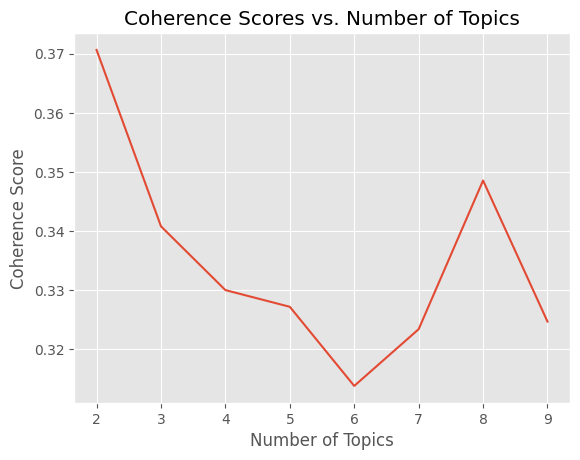

Optimal number of topics: 2


In [83]:
## find optimal # of topics
coherence_scores = []
num_topics_range = range(2, 10)  # Check for number of topics from 2 to 20

for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dic, num_topics=num_topics, passes=10, alpha='auto', per_word_topics=True, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dic, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(num_topics_range, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores vs. Number of Topics')
plt.show()

# Find the optimal number of topics
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_num_topics}")

In [65]:
#lda model parameters here, could modify these
lda_model = LdaModel(corpus=corpus,
                     id2word=dic,
                     num_topics=8,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

In [66]:
#print topics and the words in each
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"room" + 0.023*"hotel" + 0.018*"stai" + 0.014*"clean" + 0.009*"nice" + 0.008*"staff" + 0.008*"night" + 0.008*"definit" + 0.008*"locat" + 0.007*"park"
Topic: 1 
Words: 0.023*"room" + 0.009*"construct" + 0.009*"pool" + 0.009*"toilet" + 0.008*"friendli" + 0.007*"stai" + 0.007*"kid" + 0.007*"dai" + 0.006*"breakfast" + 0.005*"nice"
Topic: 2 
Words: 0.027*"room" + 0.027*"stai" + 0.015*"night" + 0.013*"hotel" + 0.010*"staff" + 0.009*"great" + 0.009*"like" + 0.008*"good" + 0.007*"dai" + 0.007*"walk"
Topic: 3 
Words: 0.029*"room" + 0.025*"hotel" + 0.017*"stai" + 0.011*"street" + 0.009*"clean" + 0.009*"staff" + 0.008*"state" + 0.008*"santa" + 0.008*"barbara" + 0.008*"walk"
Topic: 4 
Words: 0.040*"room" + 0.018*"hotel" + 0.011*"breakfast" + 0.010*"clean" + 0.010*"nice" + 0.010*"stai" + 0.009*"place" + 0.009*"great" + 0.008*"pool" + 0.008*"night"
Topic: 5 
Words: 0.024*"room" + 0.020*"stai" + 0.015*"hotel" + 0.015*"great" + 0.011*"locat" + 0.010*"park" + 0.010*"quinta" + 0.0

In [67]:
!pip install pyLDAvis
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.9 MB/s eta 0:00:00


In [68]:
#create the LDA viz, save it, display it, etc
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dic)
pyLDAvis.save_html(vis, 'lda_topics.html')
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [84]:
#lda model parameters here, could modify these
lda_model2 = LdaModel(corpus=corpus,
                     id2word=dic,
                     num_topics=2,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [85]:
#create the LDA viz, save it, display it, etc
vis = pyLDAvis.gensim_models.prepare(lda_model2, corpus, dic)
pyLDAvis.save_html(vis, 'lda_topics.html')
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [91]:
#empty topic list to add from using a loop
assigned_topics = []

#assign topics to each row
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    top_topic = sorted(doc_topics, key=lambda x: x[1], reverse=True)[0]
    assigned_topics.append((top_topic[0], top_topic[1]))

#add the assigned topics and scores to the results_df dataframe
results_df['assigned_topic_id'] = [t[0] for t in assigned_topics]
results_df['assigned_topic_score'] = [t[1] for t in assigned_topics]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



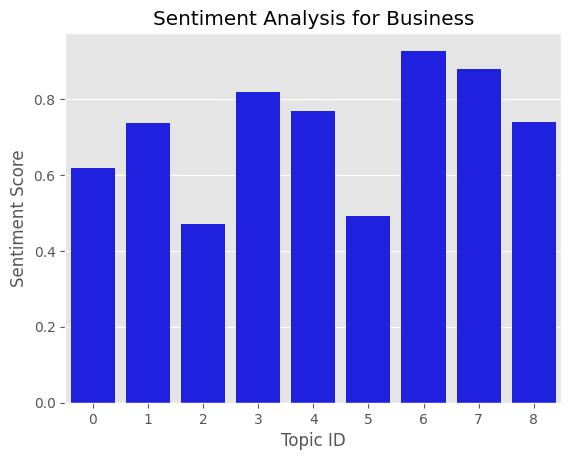

In [92]:
average_sentiment = results_df.groupby('assigned_topic_id')['vader_compound'].mean().reset_index()

# Plot a bar chart with the topic IDs on the x-axis and the sentiment scores on the y-axis
average_sentiment

sns.barplot(x='assigned_topic_id', y='vader_compound', data=average_sentiment, color='blue')
plt.xlabel('Topic ID')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis for Business')
plt.show()

In [88]:
united_df = pd.pivot_table(temp_df.loc[temp_df.business_id.isin(['9yKzy9PApeiPPOUJEtnvkg])], values = 'vader_compound', index = 'assigned_topic_id', aggfunc='mean')
southwest_df = pd.pivot_table(temp_df.loc[temp_df.business_id.isin(['ZRJwVLyzEJq1VAihDhYiow'])], values = 'vader_compound', index = 'assigned_topic_id', aggfunc='mean')
pivot_table = pd.concat([southwest_df, united_df], axis=1, keys=['Southwest', 'United'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



SyntaxError: ignored

In [89]:
# Create a heat map to visualize the data
sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt='.2f')
plt.title('Sentiment by Topic and Business')
plt.xlabel('Business')
plt.ylabel('Topic')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: ignored

## Part 7: Pick two topics (dimensions) and create a perception map of how all the airlines are located on the two-dimensional map. The axes go from -1 to 1, where 1 denotes that all the tweets pertinent to an airline about that topic are positive, whereas -1 denotes that all tweets are negative

In [ ]:
## Lets Pick topic 8 and topic 7
#topics = results_df.loc[results_df['assigned_topic_id'].isin([7, 8])]

In [ ]:
# Filtering the dataframe
filtered_df = results_df[(results_df['assigned_topic_id'] == 0) | (results_df['assigned_topic_id'] == 1)]

# Compute average compound sentiment score for each airline-topic combination
average_sentiment = filtered_df.groupby(['business_id', 'assigned_topic_id'])['vader_compound'].mean().reset_index()

# Normalize sentiment scores to a range of -1 to 1
average_sentiment['normalized_sentiment'] = average_sentiment['vader_compound'].apply(lambda x: max(min(x, 1), -1))

# Pivot the dataframe to have topics as columns
pivoted_df = average_sentiment.pivot_table(index='business_id', columns='assigned_topic_id', values='normalized_sentiment').reset_index()

# Plot the perception map
fig, ax = plt.subplots(figsize = (16,14))
pivoted_df.plot.scatter(x=1, y=5, ax=ax, s=100, xlim=(-1, 1), ylim=(-1, 1))

# Label the points with the airline names
for i, row in pivoted_df.iterrows():
    ax.text(row[1], row[5], row['business_id'], fontsize=10, horizontalalignment='left', verticalalignment='bottom')

ax.set_xlabel('Topic 2 Sentiment Score')
ax.set_ylabel('Topic 6 Sentiment Score')
ax.set_title('Airline Perception Map for Topics 2 and 6')
ax.grid(True, linestyle='--')
plt.show()

### Topic 2 - seems to deal with service overall positive
### Topic 6 - Seems to deal with credit card miles overall positive